In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Frequency in MHz
def ZZ(J, d1, d2, D, W):
    """
    Based on perturbative effective Hamiltonian.. only works if \Omega / \Delta <<1.
    
    Args
    ------
    J : exchange strenght
    d1 : delta1 = transmon1 anharmoncity
    d2 : delta2 = transmon2 anharmoncity
    D : Delta = w1 - w2?, qubit-qubit detuning
    W : CR amplitude
    return: tuple  of A, B, where ZZ = A + B*\Omega^2.
    """

    factor = J**2/2/(d1 + D)**2
    A = 2*(d1 + D)*(d1 + d2)/(D - d2)
    B =  ( (d1**3 - 2*d1*D**2 - 2*D**3)/(d1*D**2*(d2-D))
          + 1/2*(4*(3*d1+D)*(d1**2+d1*D+D**2)/(D**2*(2*d1+D)**2) - 16*D/(3*d1**2+8*d1*D+4*D**2) )
          + 2*d1/(D*d2)
          - 2*(d1+D)/(d1+D-d2)**2
          - 2*(d1+D)/d1/(d1+D-d2)

         )*W**2
    
    return (factor*A, factor*B )

def ZX(J, d1,D,W):
    """
    W: Omega in MHz
    """

    A = -J*W/D*(d1/(d1+D))
    B = J*W**3*d1**2*(3*d1**3+11*d1**2*D+15*d1*D**2+9*D**3)/2/D**3/(d1+D)**3/(d1+2*D)/(3*d1+2*D)
    return (A,B)

# ZZ

In [36]:
# plot ZZ vs \Delta
%matplotlib
J, delta1, delta2, Delta, W = 3.8,-330,-330, 5114-4914, 50

Delta = np.linspace(-700,700, 1000)
ZZ_data = ZZ(J, delta1, delta2, Delta, W)

fig, axes = plt.subplots(1,3)
axes[0].plot(Delta, ZZ_data[0],label='A')
axes[1].plot(Delta, ZZ_data[1],label='B')
axes[2].plot(Delta, ZZ_data[0]+ZZ_data[1],label='C')
for i in range(3):
    ylim = 0.5
    axes[i].set_ylim(-ylim,ylim)
    axes[i].grid()
axes[0].set_title(f'static ZZ, W={W:.1f}')
axes[1].set_title('driven ZZ')
axes[2].set_title('dynamic ZZ')

Using matplotlib backend: TkAgg


Text(0.5,1,'dynamic ZZ')

In [18]:
# plot ZZ vs \Omega for single Delta
# %matplotlib
J, delta1, delta2, Delta, W = 3.8,-330,-330, (5114-4914), 50


W = np.linspace(0,150, 100)
fig, axes = plt.subplots(1,1)
# ylim = 1
# axes.set_ylim(-ylim,ylim)
axes.grid()
axes.set_title(f'J={J:2f}, delta1={delta1:2d},delta2={delta2:2d}')
axes.set_xlabel('$\Omega$ (MHz)')
axes.set_ylabel('$ZZ$ (MHz)')

ZZ_data = ZZ(J, delta1, delta2, Delta, W)
axes.plot(W, (ZZ_data[0]+ZZ_data[1]), label=f'D={Delta:3d}')
plt.legend()

/home/jaseung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in long_scalars
/home/jaseung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/home/jaseung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


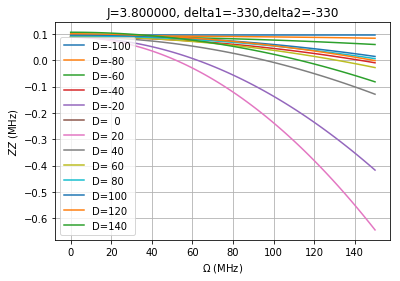

In [8]:
# plot ZZ vs \Omega for multiple Delta
# %matplotlib
J, delta1, delta2, Delta, W = 3.8,-330,-330, (5114-4914), 50

Delta = np.arange(10,330, 10)
Delta = np.arange(-100,150, 20)

W = np.linspace(0,150, 100)
fig, axes = plt.subplots(1,1)
# ylim = 1
# axes.set_ylim(-ylim,ylim)
axes.grid()
axes.set_title(f'J={J:2f}, delta1={delta1:2d},delta2={delta2:2d}')
axes.set_xlabel('$\Omega$ (MHz)')
axes.set_ylabel('$ZZ$ (MHz)')

for D in Delta:
    ZZ_data = ZZ(J, delta1, delta2, D, W)
    axes.plot(W, ZZ_data[0]+ZZ_data[1], label=f'D={D:3d}')
plt.legend()

In [9]:
Delta = np.arange(-200, 500, 100)
Delta

array([-200, -100,    0,  100,  200,  300,  400])

# ZX

/home/jaseung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/jaseung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/home/jaseung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'total ZX')

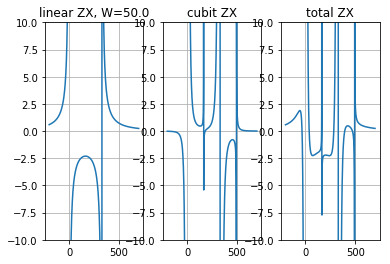

In [10]:
# plot ZX vs Delta, liner ZX, cubit ZX, total ZX
# %matplotlib
J, delta1, delta2, Delta, W = 3.8,-330,-330, (5114-4914), 50

Delta = np.linspace(-200,700, 1000)
ZX_data = ZX(J, delta1, Delta, W)

fig, axes = plt.subplots(1,3)
axes[0].plot(Delta, ZX_data[0],label='A')
axes[1].plot(Delta, ZX_data[1],label='B')
axes[2].plot(Delta, ZX_data[0]+ZX_data[1],label='C')
for i in range(3):
    ylim = 10
    axes[i].set_ylim(-ylim,ylim)
    axes[i].grid()
axes[0].set_title(f'linear ZX, W={W:.1f}')
axes[1].set_title('cubit ZX')
axes[2].set_title('total ZX')

In [28]:
# plot ZX vs Delta, 
%matplotlib
J, delta1, delta2, Delta, W = 20,-330,-330, (5114-4914), 10

Delta = np.linspace(-800,800, 1000)
ZX_data = ZX(J, delta1, Delta, W)

fig, axes = plt.subplots(1,1)

axes.plot(Delta, ZX_data[0]+ZX_data[1],label='C')
ylim = 10
axes.set_ylim(-ylim,ylim)
axes.grid()

axes.set_title('total ZX')

Using matplotlib backend: TkAgg


Text(0.5,1,'total ZX')

In [35]:
# plot linear ZX term vs Delta
# %matplotlib
J, delta1, delta2, Delta, W = 20,-330,-330, (5114-4914), 50

Delta = np.linspace(-500,800, 1000)
ZX_data = ZX(J, delta1, Delta, W)

fig, axes = plt.subplots(1,1)
axes.set_title('linear ZX')
axes.plot(Delta, ZX_data[0],label='A')
# axes[1].plot(freq, ZX_data[1],label='B')
# axes[2].plot(freq, ZX_data[0]+ZX_data[1],label='C')
# for i in range(3):
ylim = 10
axes.set_ylim(-ylim,ylim)
axes.grid()


In [30]:
# plot ZX vs \Omega
# %matplotlib
J, delta1, delta2, Delta, W = 3.8,-330,-330, (5114-4914), 50


W = np.linspace(0,150, 100)
ZX_data = ZX(J, delta1, Delta, W)

fig, axes = plt.subplots(1,1)
axes.set_title('linear + cubic ZX')
axes.plot(W, (ZX_data[0]+ZX_data[1]),label='A')

axes.grid()


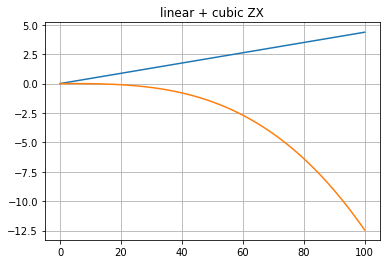

In [14]:
# plot linear ZX vs \Omega
# %matplotlib
J, delta1, delta2, Delta, W = 5,-330,-330, 420, 20

W = np.linspace(0,100, 100)
ZX_data = ZX(J, delta1, Delta, W)

fig, axes = plt.subplots(1,1)
axes.set_title('linear + cubic ZX')
axes.plot(W, ZX_data[0],label='A')
axes.plot(W, ZX_data[1],label='B')
axes.grid()
